In [1]:
#Import the libraries we need
import pandas as pd
import numpy as np

In [5]:
#Display library versions
print(f"Pandas version {pd.__version__}")
print(f"Numpy version {np.__version__}")

Pandas version 2.2.1
Numpy version 1.26.4


In [2]:
#Read in the data we need
usdcad = pd.read_csv("\\home\\volatily\\.wine\\drive_c\\Program Files\\MetaTrader 5\\MQL5\\Files\\Market Data USDCAD.csv")
usdcad = usdcad[::-1]
xauusd = pd.read_csv("\\home\\volatily\\.wine\\drive_c\\Program Files\\MetaTrader 5\\MQL5\\Files\\Market Data XAUUSD.csv")
xauusd = xauusd[::-1]
xpdusd = pd.read_csv("\\home\\volatily\\.wine\\drive_c\\Program Files\\MetaTrader 5\\MQL5\\Files\\Market Data XPDUSD.csv")
xpdusd = xpdusd[::-1]

In [3]:
#Set the time column as the index
usdcad.set_index("Time",inplace=True)
xauusd.set_index("Time",inplace=True)
xpdusd.set_index("Time",inplace=True)

In [4]:
#Let's merge the data
merged_data = usdcad.merge(xauusd,suffixes=('',' XAU'),left_index=True,right_index=True)
merged_data = merged_data.merge(xpdusd,suffixes=('',' XPD'),left_index=True,right_index=True)

In [5]:
merged_data

Open     High      Low    Close  Open XAU  High XAU  \
Time                                                                          
2024.04.22 20:52:00  1.36986  1.36987  1.36969  1.36975   2330.60   2330.99   
2024.04.22 20:53:00  1.36976  1.36976  1.36969  1.36973   2330.83   2331.40   
2024.04.22 20:54:00  1.36973  1.36974  1.36963  1.36965   2331.24   2331.46   
2024.04.22 20:55:00  1.36965  1.36986  1.36961  1.36986   2331.45   2331.62   
2024.04.22 20:56:00  1.36986  1.37001  1.36982  1.36996   2331.55   2331.56   
...                      ...      ...      ...      ...       ...       ...   
2024.07.22 13:03:00  1.37428  1.37437  1.37425  1.37429   2404.54   2404.64   
2024.07.22 13:04:00  1.37429  1.37446  1.37429  1.37445   2403.92   2404.44   
2024.07.22 13:05:00  1.37445  1.37447  1.37443  1.37444   2404.03   2404.31   
2024.07.22 13:06:00  1.37445  1.37446  1.37433  1.37433   2404.11   2404.61   
2024.07.22 13:07:00  1.37433  1.37436  1.37428  1.37435   2404.63   2404.64   

                     Low XAU  Close XAU  Open XPD  High XPD  Low XPD  \
Time                                                                   
2024.04.22 20:52:00  2330.54    2330.84   1012.42   1013.42  1012.42   
2024.04.22 20:53:00  2330.50    2331.25   1013.42   1013.42  1012.92   
2024.04.22 20:54:00  2331.15    2331.43   1013.42   1013.92  1012.92   
2024.04.22 20:55:00  2331.10    2331.55   1013.92   1013.92  1013.92   
2024.04.22 20:56:00  2331.07    2331.37   1012.92   1013.42  1012.92   
...                      ...        ...       ...       ...      ...   
2024.07.22 13:03:00  2403.91    2403.91    908.52    908.52   908.28   
2024.07.22 13:04:00  2403.87    2404.03    908.28    908.78   908.28   
2024.07.22 13:05:00  2404.00    2404.11    908.53    910.03   908.52   
2024.07.22 13:06:00  2403.73    2404.59    909.78    910.28   909.78   
2024.07.22 13:07:00  2404.40    2404.60    910.28    910.28   910.04   

                     Close XPD  
Time                            
2024.04.22 20:52:00    1013.42  
2024.04.22 20:53:00    1013.42  
2024.04.22 20:54:00    1013.92  
2024.04.22 20:55:00    1013.92  
2024.04.22 20:56:00    1013.42  
...                        ...  
2024.07.22 13:03:00     908.52  
2024.07.22 13:04:00     908.53  
2024.07.22 13:05:00     909.78  
2024.07.22 13:06:00     910.02  
2024.07.22 13:07:00     910.04  

[89160 rows x 12 columns]

In [6]:
#Define the forecast horizon
look_ahead = 20

In [7]:
#Define the predictors and target
ohlc_predictors = ['Open','High','Low','Close']
new_predictors = ['Open XAU','High XAU','Low XAU','Close XAU','Open XPD','High XPD','Low XPD','Close XPD']
predictors = ohlc_predictors + new_predictors

In [8]:
#Let's add labels to the data
merged_data["Target"] = merged_data["Close"].shift(-look_ahead)

In [9]:
#Let's also add labels to help us visualize the relationships
merged_data["Binary Target"] = np.nan
merged_data["XAU Target"] = np.nan
merged_data["XPD Target"] = np.nan

#Define the target values
#Changes in the USDCAD Exchange rate
merged_data.loc[merged_data["Close"] > merged_data["Target"],"Binary Target"] = 0
merged_data.loc[merged_data["Close"] < merged_data["Target"],"Binary Target"] = 1
#Changes in the price of Gold
merged_data.loc[merged_data["Close XAU"] > merged_data["Close XAU"].shift(-look_ahead),"XAU Target"] = 0
merged_data.loc[merged_data["Close XAU"] < merged_data["Close XAU"].shift(-look_ahead),"XAU Target"] = 1
#Changes in the price of Palladium
merged_data.loc[merged_data["Close XPD"] > merged_data["Close XPD"].shift(-look_ahead),"XPD Target"] = 0
merged_data.loc[merged_data["Close XPD"] < merged_data["Close XPD"].shift(-look_ahead),"XPD Target"] = 1

#Drop any NA values
merged_data.dropna(inplace=True)

In [10]:
merged_data

Open     High      Low    Close  Open XAU  High XAU  \
Time                                                                          
2024.04.22 20:52:00  1.36986  1.36987  1.36969  1.36975   2330.60   2330.99   
2024.04.22 20:53:00  1.36976  1.36976  1.36969  1.36973   2330.83   2331.40   
2024.04.22 20:54:00  1.36973  1.36974  1.36963  1.36965   2331.24   2331.46   
2024.04.22 20:55:00  1.36965  1.36986  1.36961  1.36986   2331.45   2331.62   
2024.04.22 20:56:00  1.36986  1.37001  1.36982  1.36996   2331.55   2331.56   
...                      ...      ...      ...      ...       ...       ...   
2024.07.22 12:43:00  1.37440  1.37449  1.37440  1.37445   2403.44   2404.50   
2024.07.22 12:44:00  1.37446  1.37451  1.37444  1.37446   2404.19   2404.19   
2024.07.22 12:45:00  1.37447  1.37450  1.37443  1.37446   2403.29   2404.07   
2024.07.22 12:46:00  1.37445  1.37451  1.37444  1.37445   2403.95   2404.63   
2024.07.22 12:47:00  1.37444  1.37446  1.37439  1.37441   2404.61   2404.79   

                     Low XAU  Close XAU  Open XPD  High XPD  Low XPD  \
Time                                                                   
2024.04.22 20:52:00  2330.54    2330.84   1012.42   1013.42  1012.42   
2024.04.22 20:53:00  2330.50    2331.25   1013.42   1013.42  1012.92   
2024.04.22 20:54:00  2331.15    2331.43   1013.42   1013.92  1012.92   
2024.04.22 20:55:00  2331.10    2331.55   1013.92   1013.92  1013.92   
2024.04.22 20:56:00  2331.07    2331.37   1012.92   1013.42  1012.92   
...                      ...        ...       ...       ...      ...   
2024.07.22 12:43:00  2403.37    2404.18    907.34    907.34   907.10   
2024.07.22 12:44:00  2403.23    2403.29    907.09    907.09   906.58   
2024.07.22 12:45:00  2403.13    2403.95    906.53    906.78   906.02   
2024.07.22 12:46:00  2403.64    2404.61    906.78    907.54   906.78   
2024.07.22 12:47:00  2404.43    2404.66    907.03    907.52   907.03   

                     Close XPD   Target  Binary Target  XAU Target  XPD Target  
Time                                                                            
2024.04.22 20:52:00    1013.42  1.36967            0.0         0.0         0.0  
2024.04.22 20:53:00    1013.42  1.36958            0.0         0.0         0.0  
2024.04.22 20:54:00    1013.92  1.36949            0.0         0.0         0.0  
2024.04.22 20:55:00    1013.92  1.36946            0.0         0.0         0.0  
2024.04.22 20:56:00    1013.42  1.36936            0.0         0.0         0.0  
...                        ...      ...            ...         ...         ...  
2024.07.22 12:43:00     907.10  1.37429            0.0         0.0         1.0  
2024.07.22 12:44:00     906.59  1.37445            0.0         1.0         1.0  
2024.07.22 12:45:00     906.52  1.37444            0.0         1.0         1.0  
2024.07.22 12:46:00     907.03  1.37433            0.0         0.0         1.0  
2024.07.22 12:47:00     907.52  1.37435            0.0         0.0         1.0  

[86734 rows x 16 columns]

In [10]:
#Explorartory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
#Display library version
print(f"Seaborn version: {sns.__version__}")

Seaborn version: 0.13.2


In [9]:
#Reset the index
merged_data.reset_index(inplace=True)

<Axes: >

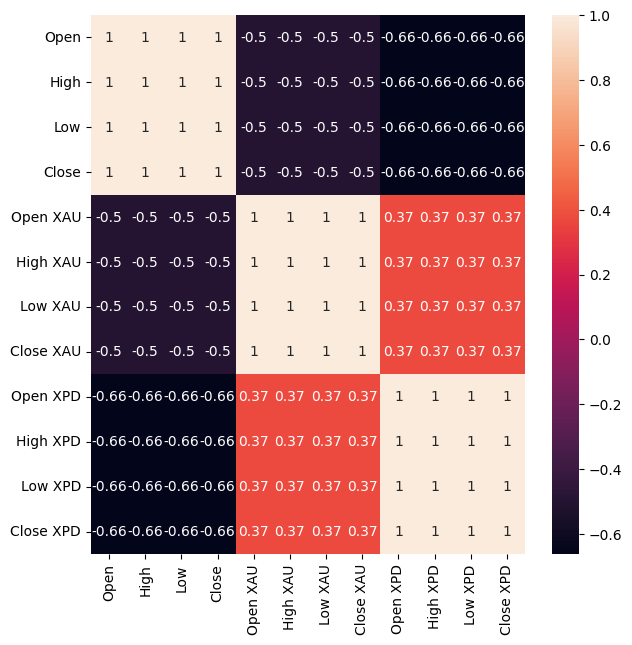

In [84]:
#Correlation heatmap
fig , ax = plt.subplots(figsize=(7,7))
sns.heatmap(merged_data.loc[:,predictors].corr(),annot=True,ax=ax)

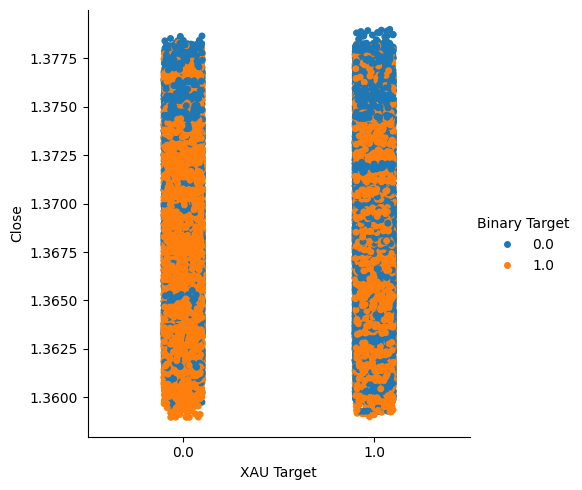

In [86]:
#Let's create categorical plots 
sns.catplot(data=merged_data,x="XAU Target",y="Close",hue="Binary Target")

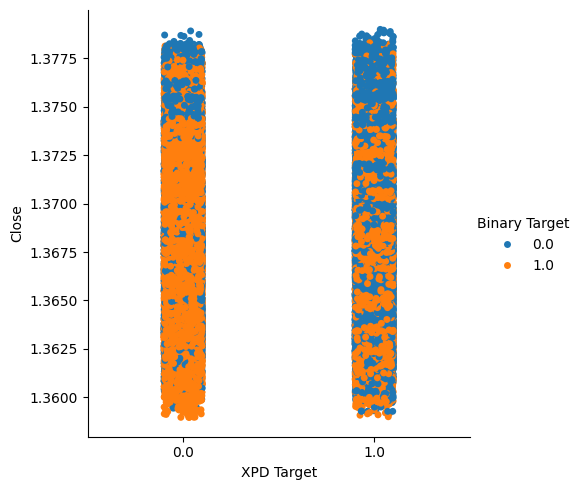

In [87]:
#Let's create categorical plots 
sns.catplot(data=merged_data,x="XPD Target",y="Close",hue="Binary Target")

<Axes: xlabel='Close XPD', ylabel='Close'>

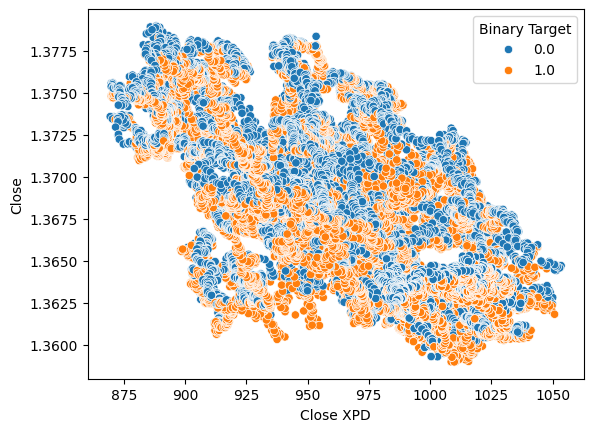

In [13]:
#Let's visualize scatter plots
sns.scatterplot(data=merged_data,x="Close XPD",y="Close",hue="Binary Target")

<Axes: xlabel='Close XAU', ylabel='Close'>

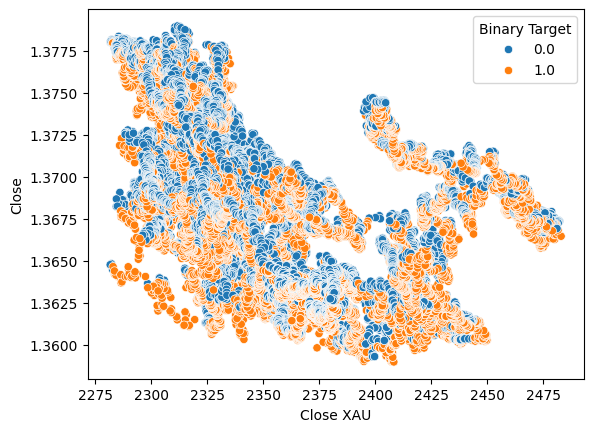

In [14]:
#Let's visualize scatter plots
sns.scatterplot(data=merged_data,x="Close XAU",y="Close",hue="Binary Target")

<Axes: xlabel='Close XPD', ylabel='Close XAU'>

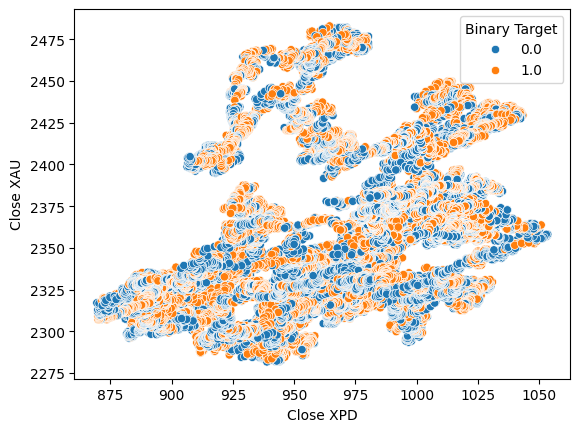

In [15]:
#Let's visualize scatter plots
sns.scatterplot(data=merged_data,x="Close XPD",y="Close XAU",hue="Binary Target")

Text(0.5, 0, 'XPDUSD')

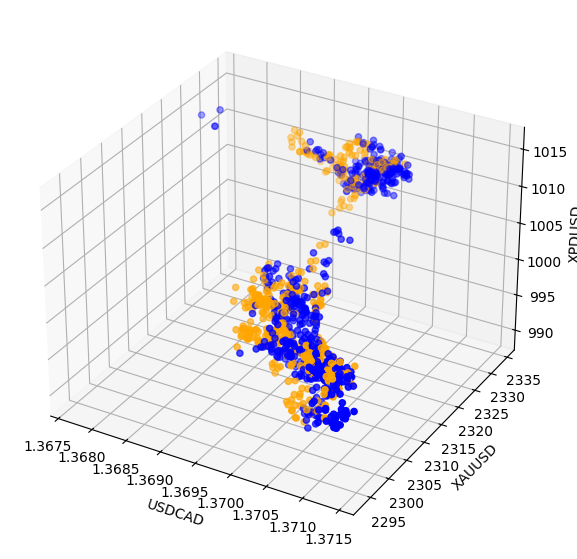

In [51]:
#Visualizing 3D data
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')
colors = ['blue' if movement == 0 else 'orange' for movement in merged_data.loc[0:1100,"Binary Target"]]
ax.scatter(merged_data.loc[0:1100,"Close"],merged_data.loc[0:1100,"Close XAU"],merged_data.loc[0:1100,"Close XPD"],c=colors)

#Set labels
ax.set_xlabel('USDCAD')
ax.set_ylabel('XAUUSD')
ax.set_zlabel('XPDUSD')

In [12]:
#Modelling the data
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [43]:
#Print library version
print(f"Sklearn version {sklearn.__version__}")

Sklearn version 1.4.1.post1


In [13]:
#Scale the data
scaled_data = pd.DataFrame(RobustScaler().fit_transform(merged_data.loc[:,predictors]),columns=predictors)

In [14]:
#Split the data 
train_X,test_X,train_y,test_y = train_test_split(scaled_data,merged_data.loc[:,"Target"],shuffle=False,test_size=0.5)

In [15]:
#Preparing to model the data
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , BaggingRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error

In [16]:
#Create the time series split object
tscv = TimeSeriesSplit(gap=look_ahead,n_splits=5)

In [17]:
#Create a list of models
models = [
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    BaggingRegressor(),
    LinearSVR(),
    KNeighborsRegressor(),
    MLPRegressor(hidden_layer_sizes=(100,10))
]

In [94]:
#List of models
columns = [
    "Linear Regression",
    "Random Forest",
    "Gradient Boost",
    "Bagging",
    "Linear SVR",
    "K-Neighbors",
    "Neural Network"
]

#Create a dataframe to store our error metrics
ohlc_error = pd.DataFrame(columns=columns,index=np.arange(0,5))
new_error = pd.DataFrame(columns=columns,index=np.arange(0,5))
all_error = pd.DataFrame(columns=columns,index=np.arange(0,5))

In [105]:
#Setting the current predictors
current_predictors = predictors

In [106]:
#Perform cross validation
for j in np.arange(0,len(models)):
    model = models[j]
    for i,(train,test) in enumerate(tscv.split(train_X)):
        model.fit(train_X.loc[train[0]:train[-1],current_predictors],train_y.loc[train[0]:train[-1]])
        all_error.iloc[i,j] = root_mean_squared_error(train_y.loc[test[0]:test[-1]],model.predict(train_X.loc[test[0]:test[-1],current_predictors]))

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarn

In [130]:
ohlc_error

Linear Regression Random Forest Gradient Boost   Bagging Linear SVR  \
0          0.000642      0.002691        0.00279  0.002646    0.00121   
1          0.000478      0.000694        0.00065  0.000711   0.000505   
2          0.000464      0.000825       0.000608   0.00083   0.000623   
3           0.00042      0.000492       0.000434  0.000514   0.000425   
4          0.000578      0.000623       0.000583  0.000643   0.000627   

  K-Neighbors Neural Network  
0    0.002707       0.051936  
1    0.000683       0.010897  
2     0.00077       0.004033  
3    0.000485       0.001399  
4    0.000619       0.002693

<Axes: >

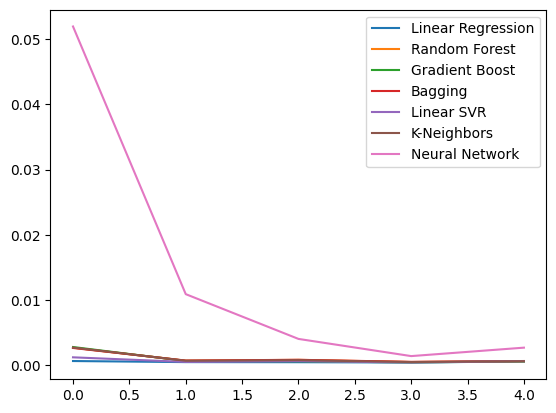

In [118]:
ohlc_error.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x73b383f5e3e0>,
 'caps': [<matplotlib.lines.Line2D at 0x73b383f5e920>,
 'boxes': [<matplotlib.lines.Line2D at 0x73b383f5e140>,
 'medians': [<matplotlib.lines.Line2D at 0x73b383f5ee60>,
 'fliers': [<matplotlib.lines.Line2D at 0x73b383f5f100>,
 'means': []}

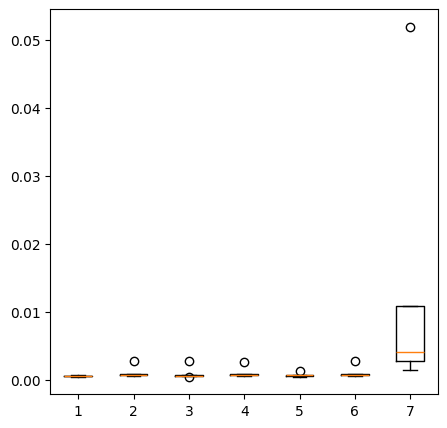

In [133]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(ohlc_error)

In [102]:
new_error

Linear Regression Random Forest Gradient Boost   Bagging Linear SVR  \
0          0.003612      0.005571       0.004803  0.005525    0.00418   
1          0.003573      0.003742       0.003231   0.00373   0.004728   
2           0.00428      0.003647       0.003911  0.003655    0.00392   
3          0.003105      0.003759       0.003659  0.003788   0.003272   
4          0.003779      0.005154        0.00365  0.005241   0.004331   

  K-Neighbors Neural Network  
0     0.00446       0.168063  
1    0.002927       0.052575  
2     0.00401       0.214544  
3    0.003775       0.006475  
4    0.004849       0.044287

<Axes: >

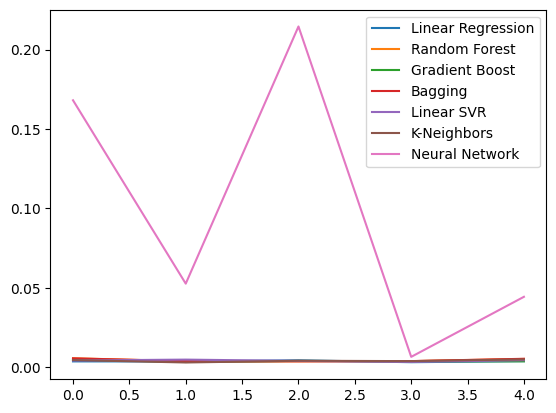

In [131]:
new_error.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x73b383839420>,
 'caps': [<matplotlib.lines.Line2D at 0x73b3838397b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x73b383839180>,
 'medians': [<matplotlib.lines.Line2D at 0x73b383839cf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x73b383839f90>,
 'means': []}

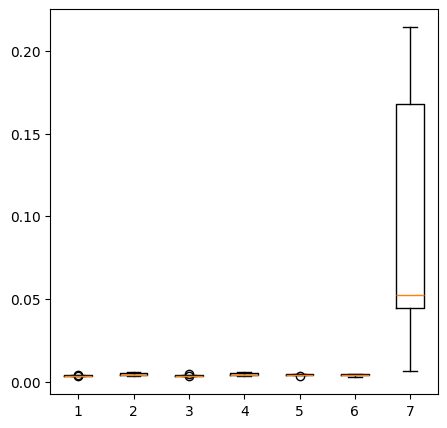

In [135]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(new_error)

In [107]:
all_error

Linear Regression Random Forest Gradient Boost   Bagging Linear SVR  \
0          0.000664      0.002442       0.002814  0.002455   0.000803   
1          0.000475      0.000884       0.000697  0.000933   0.000717   
2          0.000473      0.001908       0.001454  0.001854   0.000587   
3          0.000421      0.000641       0.000481  0.000664    0.00056   
4          0.000582      0.000792       0.000689  0.000809   0.000596   

  K-Neighbors Neural Network  
0    0.002821        0.18847  
1    0.001497       0.046457  
2    0.002468       0.291746  
3    0.001011       0.008432  
4     0.00139       0.035837

<Axes: >

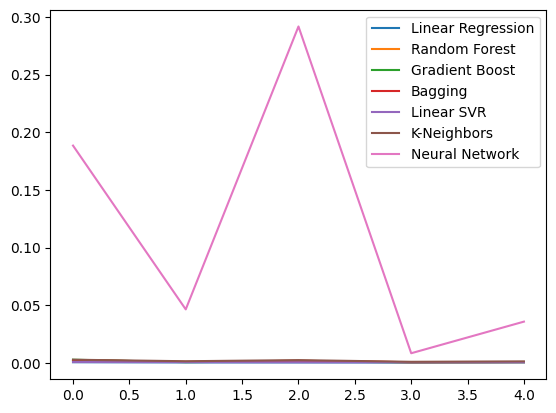

In [136]:
all_error.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x73b3837bb190>,
 'caps': [<matplotlib.lines.Line2D at 0x73b3837bb6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x73b3837bafb0>,
 'medians': [<matplotlib.lines.Line2D at 0x73b3837bbc10>,
 'fliers': [<matplotlib.lines.Line2D at 0x73b3837bbeb0>,
 'means': []}

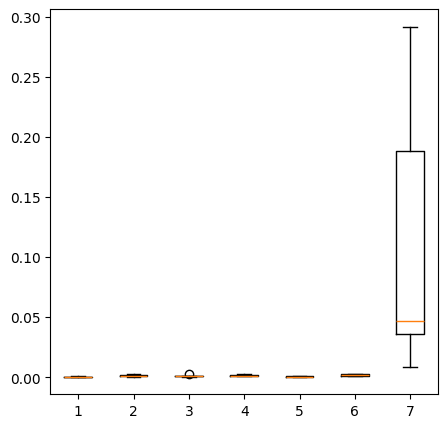

In [138]:
fig = plt.figure(figsize=(5,5))
plt.boxplot(all_error)

In [149]:
all_error.mean()

Linear Regression    0.000523
Random Forest        0.001333
Gradient Boost       0.001227
Bagging              0.001343
Linear SVR           0.000653
K-Neighbors          0.001837
Neural Network       0.114188
dtype: object

In [25]:
#Mutual information score
from sklearn.feature_selection import mutual_info_regression

In [35]:
#Prepare the data for plotting
mi = mutual_info_regression(train_X,train_y)
mi = mi.reshape(1,12)
mi_scores = pd.DataFrame(mi,columns=predictors)

<Axes: >

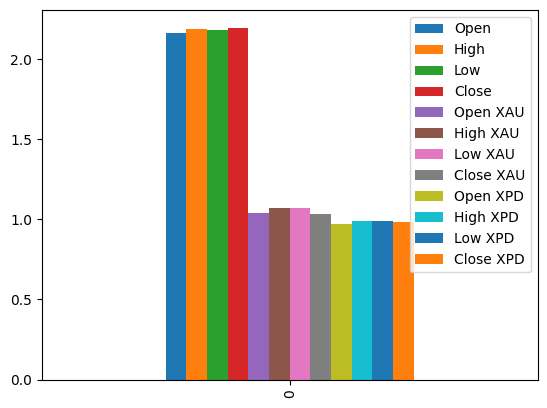

In [38]:
#Plot the scores
mi_scores.plot.bar()

In [39]:
mi_scores

Open      High       Low     Close  Open XAU  High XAU   Low XAU  \
0  2.165637  2.186569  2.182546  2.196958  1.039399  1.069697  1.071835   

   Close XAU  Open XPD  High XPD   Low XPD  Close XPD  
0   1.035501  0.971574  0.989954  0.988473   0.982091

In [153]:
#The Linear SVR appears to be performing second best
import shap

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [155]:
#Initialize the model
model = LinearSVR()
model.fit(train_X,train_y)

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [159]:
#Compute SHAP values
explainer = shap.Explainer(model,train_X)
explanations = explainer(train_X)

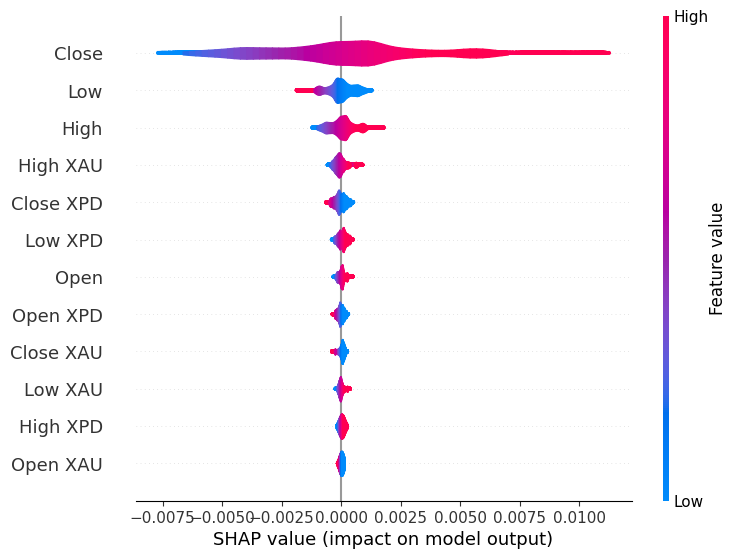

In [165]:
#Plot SHAP values
shap.plots.violin(explanations)

In [41]:
#Parameter tuning 
from sklearn.model_selection import RandomizedSearchCV

In [42]:
#Reinitialize the model
model = LinearSVR()

In [48]:
#Define the tuner
tuner = RandomizedSearchCV(
    model,
    {
        "epsilon" : [0,10,100,1000],
        "tol":[0.01,0.001,0.0001,0.00001,0.0000001],
        "C":[1,10,100,1000,10000],
        "loss":['epsilon_insensitive', 'squared_epsilon_insensitive']  
    },
    n_iter=1000,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

In [49]:
#Let's fit the tuner
tuner_results = tuner.fit(train_X,train_y)

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
#Let's see the best parameters we found
tuner_results.best_params_

{'tol': 1e-05, 'loss': 'squared_epsilon_insensitive', 'epsilon': 0, 'C': 10000}

In [67]:
#Testing for overfitting
benchmark =  LinearRegression()
default_lsvr = LinearSVR()
customized_lsvr = LinearSVR(tol=1e-05,loss='squared_epsilon_insensitive',epsilon=0,C=10000)

In [56]:
#Reset the indexes
test_y = test_y.reset_index()
test_X = test_X.reset_index()

In [58]:
#Format the data
test_y = test_y.loc[:,"Target"]
test_X = test_X.loc[:,predictors]

In [66]:
#Create dataframes to store our error levels
test_error = pd.DataFrame(columns=["Linear Regression","LSVR","Customized LSVR"],index=[0,1,2,3,4])

In [68]:
#Fit the models on the training set
benchmark.fit(train_X,train_y)
default_lsvr.fit(train_X,train_y)
customized_lsvr.fit(train_X,train_y)

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=10000, epsilon=0, loss='squared_epsilon_insensitive', tol=1e-05)

In [69]:
models = [benchmark,default_lsvr,customized_lsvr]

In [70]:
for j in np.arange(0,len(models)):
    model = models[j]
    for i,(train,test) in enumerate(tscv.split(test_X)):
        model.fit(test_X.loc[train[0]:train[-1],:],test_y.loc[train[0]:train[-1]])
        test_error.iloc[i,j] = root_mean_squared_error(test_y.loc[test[0]:test[-1]],model.predict(test_X.loc[test[0]:test[-1],:]))

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarn

In [72]:
test_error

Linear Regression      LSVR Customized LSVR
0          0.000598  0.000542        0.000743
1          0.000472  0.000573        0.000722
2          0.000318  0.000451        0.000333
3          0.000341  0.000366        0.000499
4           0.00043  0.000839         0.00043

In [73]:
#Let's calculate our mean performances
test_error.mean()

Linear Regression    0.000432
LSVR                 0.000554
Customized LSVR      0.000545
dtype: object

<Axes: >

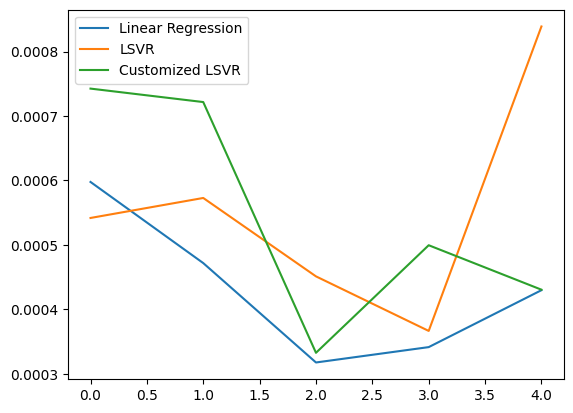

In [74]:
#Let's visualize our error
test_error.plot()

<Axes: >

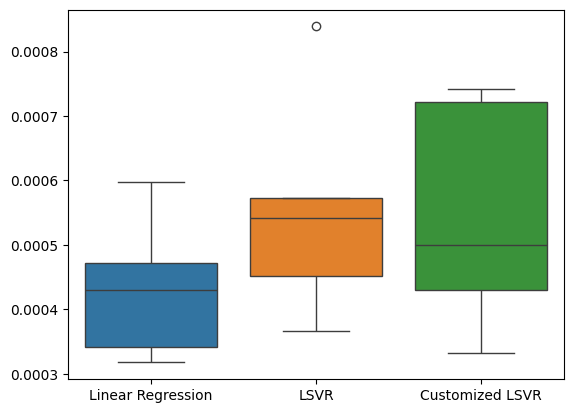

In [78]:
#Create a boxplot of the error
sns.boxplot(data=test_error)

In [27]:
#Let's scale our data
scaling_factors = pd.DataFrame(columns=predictors,index=['mean','standard deviation'])
X = merged_data.loc[:,predictors]
y = merged_data.loc[:,"Target"]

In [13]:
#Let's fill each column
for i in np.arange(0,len(predictors)):
    scaling_factors.iloc[0,i] = X.iloc[:,i].mean() 
    scaling_factors.iloc[1,i] = X.iloc[:,i].std()
    X.iloc[:,i] = ( ( X.iloc[:,i] - scaling_factors.iloc[0,i] ) / scaling_factors.iloc[1,i])
scaling_factors

Open      High       Low     Close     Open XAU  \
mean                1.367834  1.367896  1.367774  1.367834  2351.794221   
standard deviation    0.0043  0.004302  0.004298    0.0043    40.552396   

                       High XAU      Low XAU    Close XAU    Open XPD  \
mean                2352.145707  2351.440579  2351.795114  962.982498   
standard deviation    40.563802    40.538917    40.552904   39.173526   

                      High XPD     Low XPD   Close XPD  
mean                963.315291  962.649288  962.985579  
standard deviation   39.190555   39.149686   39.173116

In [15]:
#Save the scaling factors as a CSV
scaling_factors.to_csv("/home/volatily/.wine/drive_c/Program Files/MetaTrader 5/MQL5/Files/usd_cad_xau_xpd_scaling_factors.csv")

In [16]:
#Let's prepare to export our model to ONNX format
import onnx
import netron
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [88]:
#Display library versions
print(f"Onnx version: {onnx.__version__}")
print(f"Netron version: {netron.__version__}")
print(f"Skl2onnx version: {skl2onnx.__version__}")

Onnx version: 1.15.0
Netron version: 7.8.0
Skl2onnx version: 1.16.0


In [19]:
#Define the input type
initial_types = [('float_input',FloatTensorType([1,12]))]

In [28]:
#Train the model on all the data we have
customized_lsvr = LinearSVR(tol=1e-05,loss='squared_epsilon_insensitive',epsilon=0,C=10000)
customized_lsvr.fit(X,y)

Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(C=10000, epsilon=0, loss='squared_epsilon_insensitive', tol=1e-05)

In [29]:
#Covert the sklearn model
onnx_model = convert_sklearn(customized_lsvr,initial_types=initial_types)

In [30]:
#Save the onnx model
onnx_name = "USDCAD XAUUSD XPDUSD M1 Float.onnx"
onnx.save(onnx_model,onnx_name)

In [99]:
#View the onnx model
netron.start(onnx_name)

Serving 'USDCAD XAUUSD XPDUSD M1 Float.onnx' at http://localhost:8080


('localhost', 8080)

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 45038)
Traceback (most recent call last):
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 683, in process_request_thread
    self.finish_request(request, client_address)
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\http\server.py", line 427, in handle
    self.handle_one_request()
  File "C:\users\volatily\AppData\Local\Programs\Python\Python310\lib\http\server.py", line 415, in handle_one_request
    method()
  File "Z:\home\volatily\Downloads\Python Env\MT5\MT5\lib\site-packages\netron\server.py", line 110, in 